In [1]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rps.zip

--2020-05-23 03:28:05--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 307.92M  8.65MB/s    in 41s     

2020-05-23 03:28:46 (7.60 MB/s) - ‘/tmp/rps.zip’ saved [322873683/322873683]



Lalu lakukan Ekstrak pada data tersebut

In [0]:
import os
import zipfile

#buat variabel yang merujuk pada tempat file zip disimpan
local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp')
zip_ref.close() 

Lalu kita perlu melakukan pengecekan apakah data yang telah kita ekstrak memiliki struktur direktori dan label seperti yang kita harapkan.

In [0]:
rock_dir = os.path.join('/content/tmp/rockpaperscissors/rock')
paper_dir = os.path.join('/content/tmp/rockpaperscissors/paper')
scissors_dir = os.path.join('/content/tmp/rockpaperscissors/scissors')

In [28]:
print('Total gambar batu untuk training:', len(os.listdir(rock_dir)))
print('total gambar kertas untuk training:', len(os.listdir(paper_dir)))
print('total gambar gunting untuk training:', len(os.listdir(scissors_dir)))

Total gambar batu untuk training: 726
total gambar kertas untuk training: 712
total gambar gunting untuk training: 750


In [7]:
rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(rock_files[:10])

scissors_files=os.listdir(scissors_dir)
print(scissors_files[:10])

['nu556y52qDHFKRYy.png', '5G0hCO6RJXNyxcgV.png', 'PxixapAFqLmRaP6k.png', 'X9KQv42y96rD2TO9.png', '51TTZXCnAuk3Ck6s.png', '2f25VA1nfxiC86xj.png', 'bsj2s38rcZvedHSI.png', 'JslFc8olsoXrWyG0.png', 'SNEJ1wGU1s9Dm3I1.png', 'KYa6DwgYNkoUZhMp.png']
['nu556y52qDHFKRYy.png', '5G0hCO6RJXNyxcgV.png', 'PxixapAFqLmRaP6k.png', 'X9KQv42y96rD2TO9.png', '51TTZXCnAuk3Ck6s.png', '2f25VA1nfxiC86xj.png', 'bsj2s38rcZvedHSI.png', 'JslFc8olsoXrWyG0.png', 'SNEJ1wGU1s9Dm3I1.png', 'KYa6DwgYNkoUZhMp.png']
['kC1AoCFrvaMKlTDk.png', 'e8p8cRK4gABNoiaZ.png', '2E8j595xseKRF60J.png', 'uJ286TPihhYw3Y3S.png', 'XWF7hCQnD6qfJUCI.png', 'wT8z7icdMJt816Ix.png', 'kCoX1GxQ9o2ZhRy9.png', 'R27mU9zJCmv8wi1o.png', '1VRzspyXpQ6A2rKy.png', 'bLJSE1dl7VbQCUF9.png']


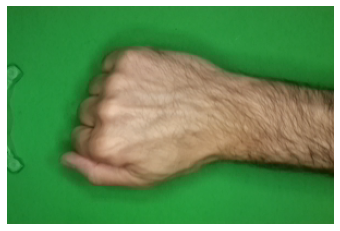

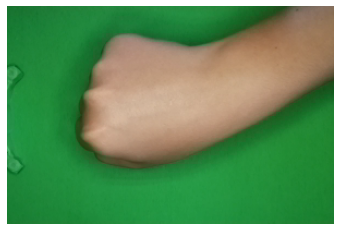

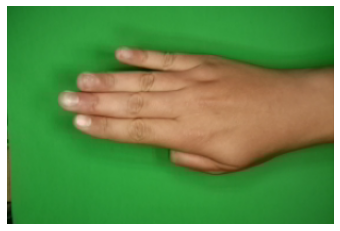

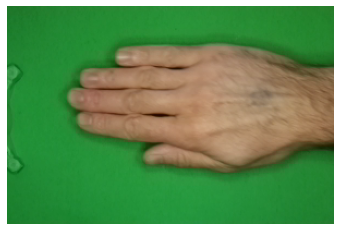

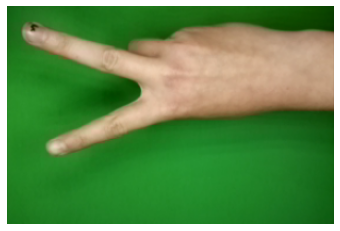

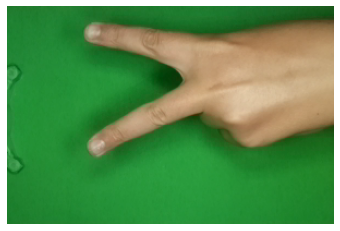

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
              for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
              for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                  for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors) :
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()


Lalu pada tahp selanjutnya kita definisikan varaibel untuk melakukan training  dan validation terhadap datasets.

In [13]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/tmp/rockpaperscissors/rps-cv-images"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
    fill_mode='nearest')



train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical',
    subset='training',
    batch_size=126
)

validation_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126,
    subset='validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


Buat model machine learning

In [0]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        # Convolutional kedua
        tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        #Convulitional ketiga
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        #Convulional terakhir
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        #Flatten the results
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')                       
])

Lalu tampilkan  model yang telah dibuat.

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

Lalu lakukan compile terhadap model yang telah dibuat.

In [0]:
model.compile(loss =tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='rmsprop', metrics=['accuracy'])

Selanjutnya lakukan training pada model yang telah dibuat.

In [22]:
history = model.fit(train_generator, epochs=15, steps_per_epoch=10, validation_data = validation_generator, verbose = 2, validation_steps=3)

Epoch 1/15
10/10 - 81s - loss: 0.7490 - accuracy: 0.7971 - val_loss: 0.7129 - val_accuracy: 0.8333
Epoch 2/15
10/10 - 81s - loss: 0.6922 - accuracy: 0.8589 - val_loss: 0.7240 - val_accuracy: 0.8201
Epoch 3/15
10/10 - 82s - loss: 0.7160 - accuracy: 0.8348 - val_loss: 0.6692 - val_accuracy: 0.8783
Epoch 4/15
10/10 - 82s - loss: 0.7002 - accuracy: 0.8484 - val_loss: 0.7387 - val_accuracy: 0.8042
Epoch 5/15
10/10 - 81s - loss: 0.7091 - accuracy: 0.8396 - val_loss: 0.7361 - val_accuracy: 0.8042
Epoch 6/15
10/10 - 82s - loss: 0.7041 - accuracy: 0.8436 - val_loss: 0.7032 - val_accuracy: 0.8386
Epoch 7/15
10/10 - 82s - loss: 0.6907 - accuracy: 0.8627 - val_loss: 0.6488 - val_accuracy: 0.9021
Epoch 8/15
10/10 - 81s - loss: 0.6826 - accuracy: 0.8661 - val_loss: 0.6688 - val_accuracy: 0.8862
Epoch 9/15
10/10 - 84s - loss: 0.6575 - accuracy: 0.8957 - val_loss: 0.7758 - val_accuracy: 0.7725
Epoch 10/15
10/10 - 82s - loss: 0.7046 - accuracy: 0.8444 - val_loss: 0.7296 - val_accuracy: 0.8201
Epoch 11/

In [0]:
model.save("rps.h5")

Lakukan visulisasi terhadap loss dan akurasi

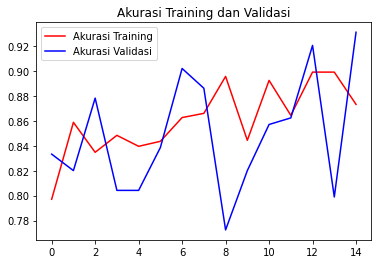

<Figure size 432x288 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label="Akurasi Training")
plt.plot(epochs, val_accuracy, 'b', label="Akurasi Validasi")
plt.title('Akurasi Training dan Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

Lakukan juga Visualisasi terhadap Loss akurasi dan validasi

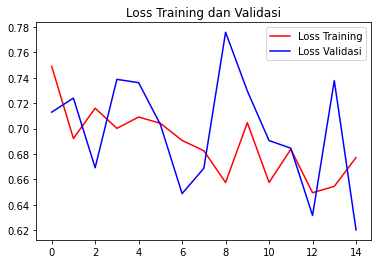

<Figure size 432x288 with 0 Axes>

In [25]:
epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label="Loss Training")
plt.plot(epochs, val_loss, 'b', label="Loss Validasi")
plt.title('Loss Training dan Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

Langkah terakhir, lakukan percobaan dengan mengupload file.

Using TensorFlow backend.


Saving data.jpg to data.jpg
data.jpg
[[1. 0. 0.]]
Kertas


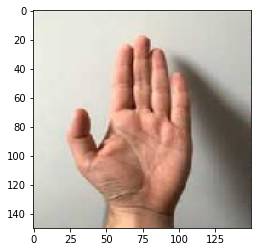

In [26]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  #Lakukan prediksi gambar
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
  if classes[0][0] == 1:
    print("Kertas")
  elif classes[0][1]==1:
    print ("Batu")
  else:
    print ("Gunting")

Model telah mengenali gambar dengan baik.